# PRODIGY_DS_03/Nada Mohamed Abd ElRasoul


Input variables:

bank client data
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   #related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   #other attributes:
   
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Import important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as warn
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# read datasets
data= pd.read_csv('bank.csv',delimiter=';')


In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.shape

(4521, 17)

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Output variable (desired target):

y -> has the client subscribed a term deposit?
(binary: "yes","no")

# EDA & Data pre-processing

In [6]:
#rename column y to deposit
data.rename(columns={'y':'deposit'} , inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Now we've aleady made sure that data is clean from any duplicates and doesn't have any null values 

<Axes: >

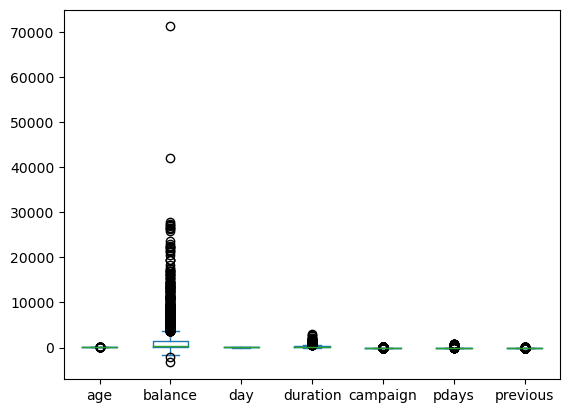

In [9]:
data.plot(kind='box')

In [10]:
data['age'].max()

87

In [11]:
data['balance'].max()

71188

In [12]:
data['duration'].max()

3025

In [13]:
data['campaign'].max()

50

In [14]:
data['pdays'].max()

871

In [15]:
data['previous'].max()

25

All of them are logically corrcet so we can't trim it or consider it as outlier

# Visulaization 

<Axes: ylabel='Density'>

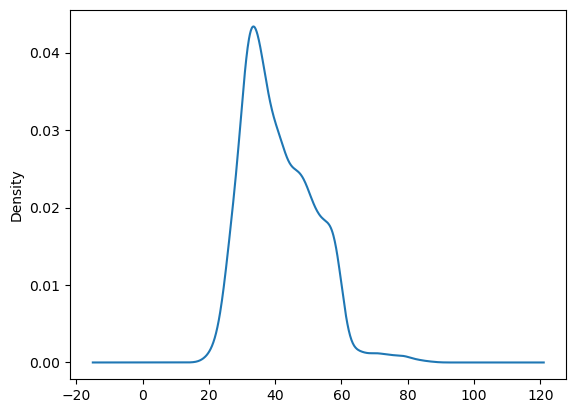

In [16]:
data.age.plot(kind='kde')

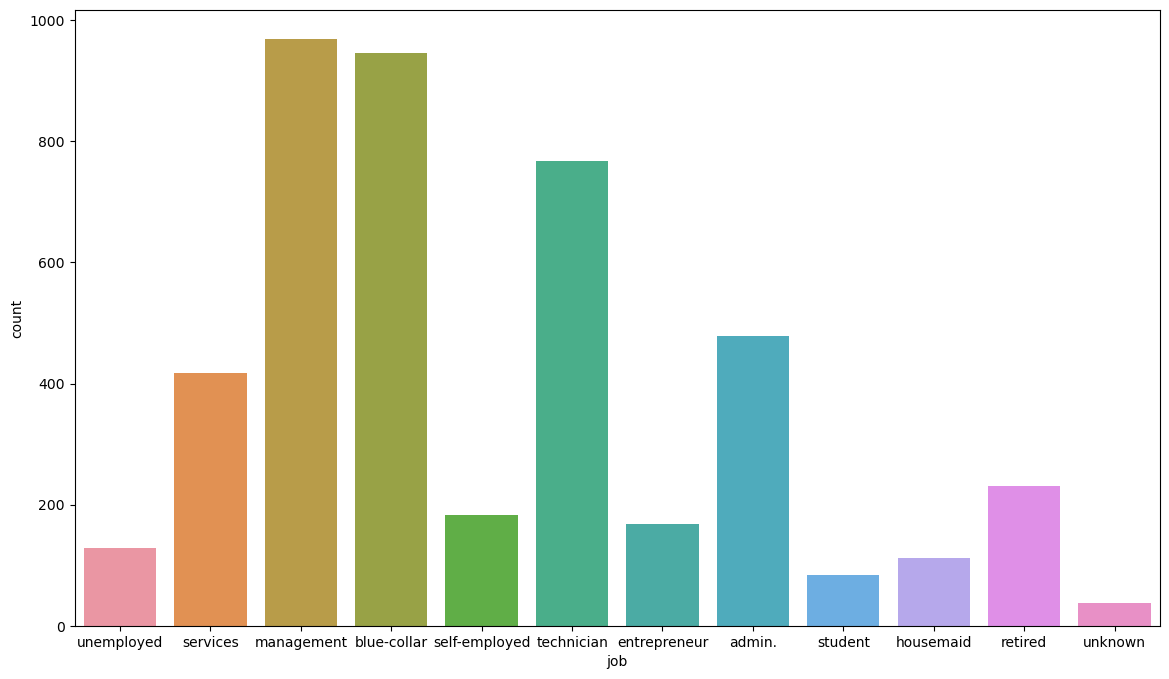

In [17]:
plt.figure(figsize=(14, 8))
sns.countplot(x='job', data=data)
plt.show()

<Axes: xlabel='education', ylabel='count'>

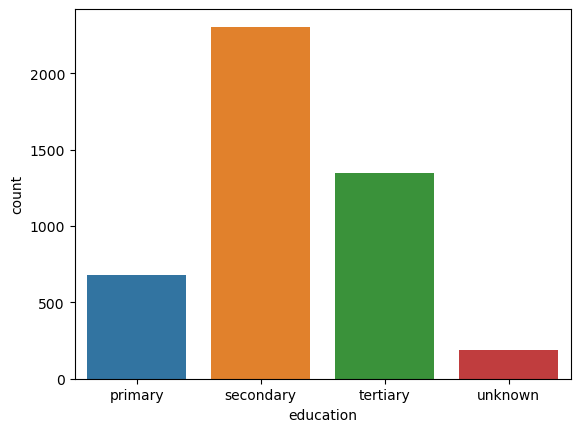

In [18]:
sns.countplot(x='education',data=data)


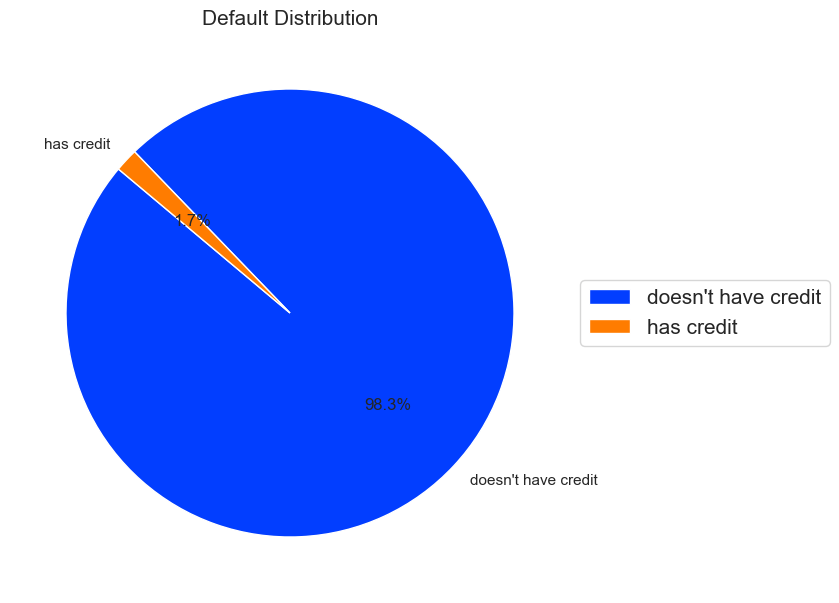

In [19]:
sns.set(style="whitegrid")
default_counts = data["default"].value_counts()

labels = ["doesn't have credit", "has credit"]
colors = sns.color_palette("bright")[0:2]  
fig, axs = plt.subplots(figsize=(8, 8))
plt.pie(default_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Default Distribution', size=15)
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.subplots_adjust(left=0.1, right=0.8)
plt.show()

as we can see most of customers doesn't have credit by default

# Encoding

In [20]:
data['default'] = data['default'].map({'yes': 1, 'no': 0})
data['housing'] = data['housing'].map({'yes': 1, 'no': 0})
data['loan'] = data['loan'].map({'yes': 1, 'no': 0})
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})

job_mapping = {
    'admin.': 1, 'unknown': 2, 'unemployed': 3, 'management': 4, 'housemaid': 5, 
    'entrepreneur': 6, 'student': 7, 'blue-collar': 8, 'self-employed': 9, 
    'retired': 10, 'technician': 11, 'services': 12
}

marital_mapping = {
    'married': 1, 'divorced': 2, 'single': 3
}

education_mapping = {
    'unknown': 1, 'secondary': 2, 'primary': 3, 'tertiary': 4
}

contact_mapping = {
    'unknown': 0, 'telephone': 2, 'cellular': 1
}

poutcome_mapping = {
    'unknown': 3, 'other': 4, 'failure': 0, 'success': 1
}
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}


# Apply mapping
data['job'] = data['job'].map(job_mapping)
data['marital'] = data['marital'].map(marital_mapping)
data['education'] = data['education'].map(education_mapping)
data['contact'] = data['contact'].map(contact_mapping)
data['poutcome'] = data['poutcome'].map(poutcome_mapping)
data['month'] = data['month'].map(month_mapping)


# Check the updated data
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,3,1,3,0,1787,0,0,1,19,10,79,1,-1,0,3,0
1,33,12,1,2,0,4789,1,1,1,11,5,220,1,339,4,0,0
2,35,4,3,4,0,1350,1,0,1,16,4,185,1,330,1,0,0
3,30,4,1,4,0,1476,1,1,0,3,6,199,4,-1,0,3,0
4,59,8,1,2,0,0,1,0,0,5,5,226,1,-1,0,3,0


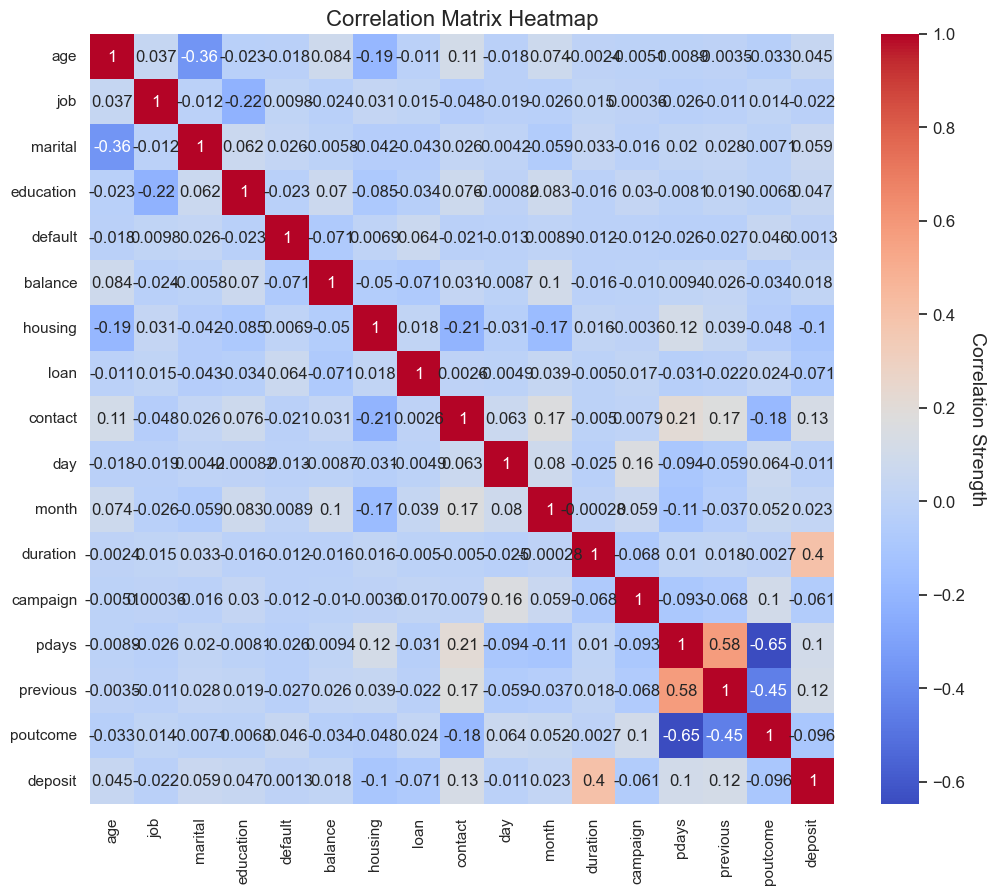

In [21]:
#check on data correlation
sns.set(style="whitegrid")
numeric_df = data.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
plt.title("Correlation Matrix Heatmap", fontsize=16)
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', ax=ax)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Correlation Strength', rotation=270, fontsize=14, labelpad=15)
plt.show()

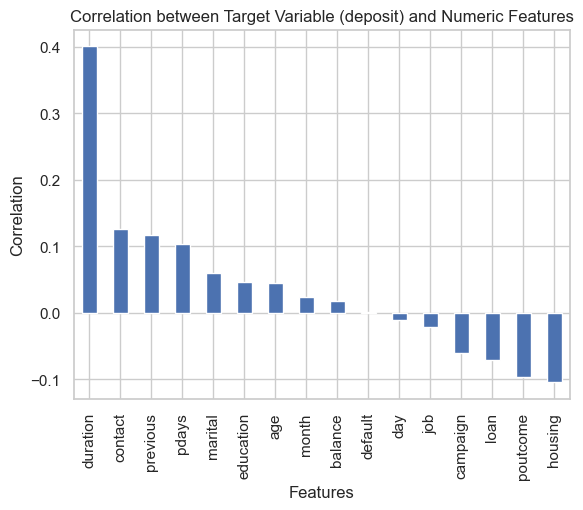

In [22]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation = data[numeric_columns].corr()['deposit'].sort_values(ascending=False)
correlation = correlation.drop('deposit')
correlation.plot(kind='bar')
plt.title('Correlation between Target Variable (deposit) and Numeric Features')
plt.ylabel('Correlation')
plt.xlabel('Features')

plt.show()

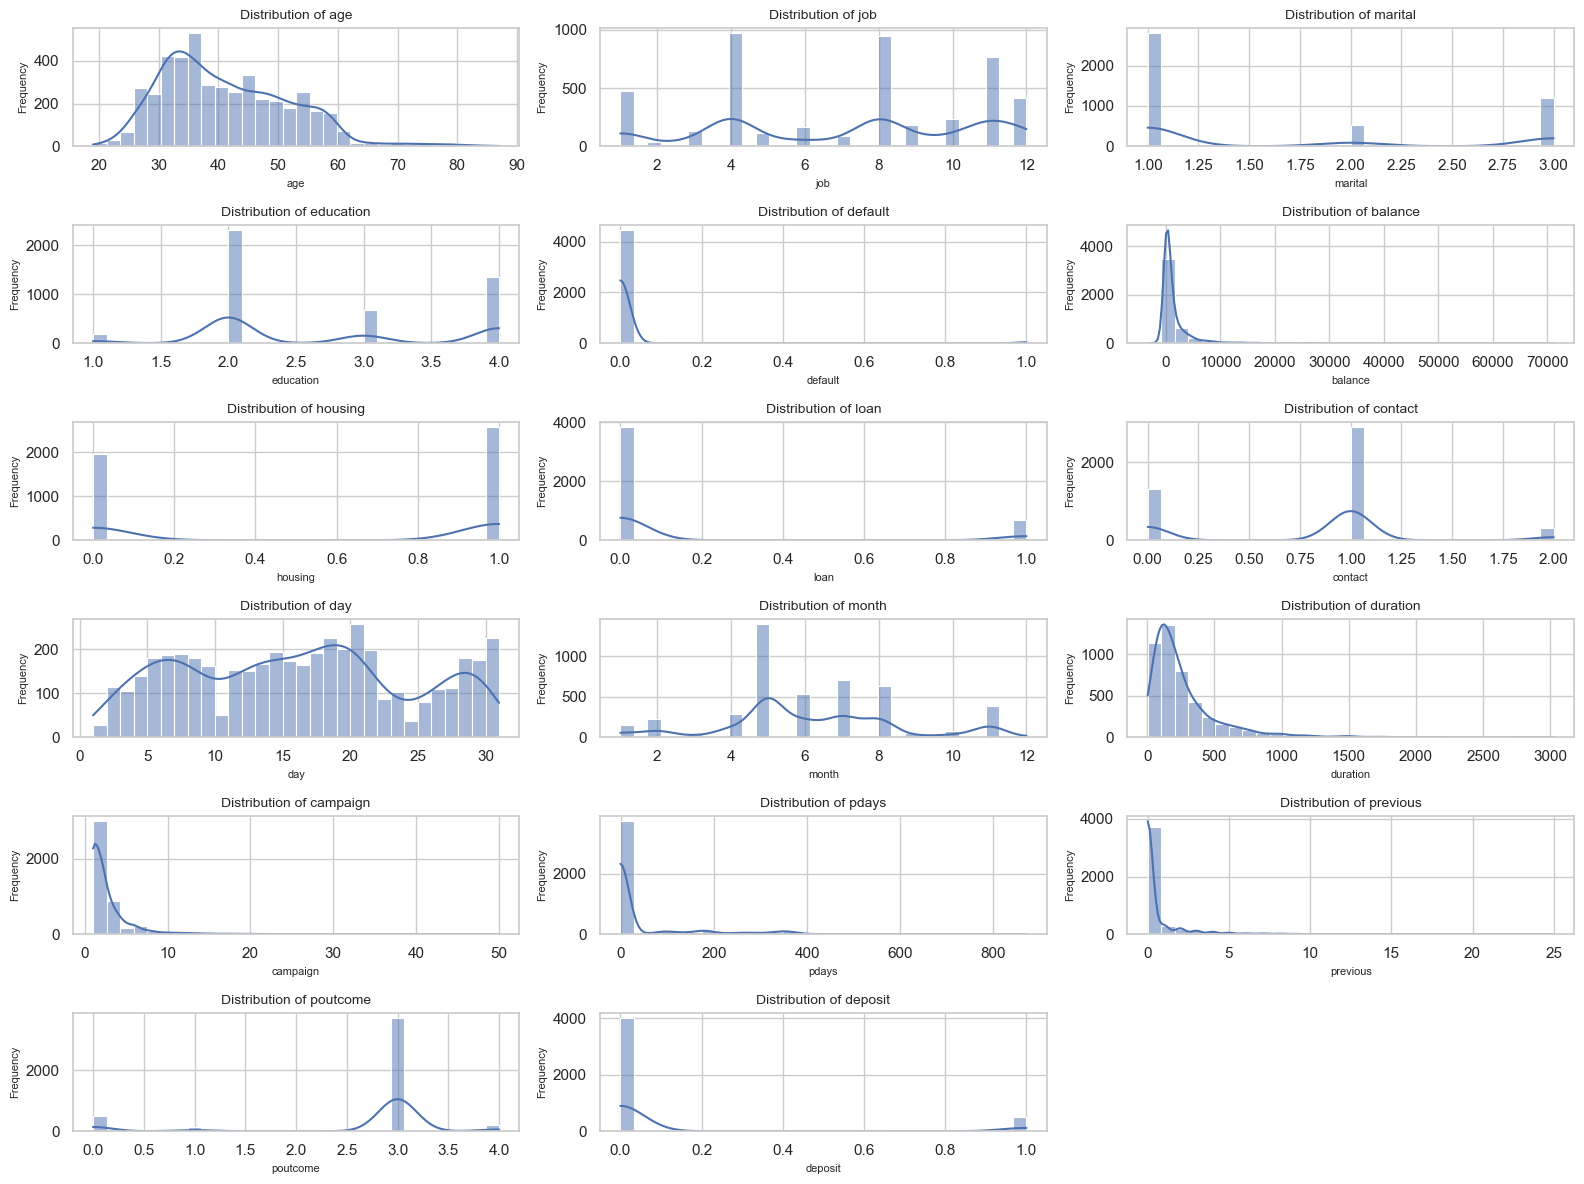

In [23]:
#check on skewness
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(16, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)  # Adjust layout to fit all plots
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}', fontsize=10)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()

The data is normally distributed 

# Splitting the data into training and test datasets

In [24]:
from sklearn.model_selection import train_test_split

X = data.drop('deposit', axis=1)
y = data.deposit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3616, 16)
(905, 16)
(3616,)
(905,)


# Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
cols = X.columns
df_standard = pd.DataFrame(data=X_train, columns=cols)
df_standard.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.678371,-0.322284,0.409252,1.379147,-0.124278,-0.413804,-1.127545,-0.425356,0.403805,0.489967,2.025453,0.416038,-0.567241,-0.408832,-0.314583,0.334635
1,-0.866030,-0.893970,-0.740597,1.379147,-0.124278,0.334571,-1.127545,-0.425356,0.403805,-0.238237,0.770764,-0.507522,0.671186,-0.408832,-0.314583,0.334635
2,-0.678371,1.106929,1.559101,-0.746144,-0.124278,-0.121913,-1.127545,-0.425356,0.403805,-0.966441,0.770764,-0.756922,-0.257635,-0.408832,-0.314583,0.334635
3,-0.959860,-0.893970,-0.740597,1.379147,-0.124278,-0.451815,-1.127545,-0.425356,0.403805,-0.359604,0.770764,1.530545,1.290399,-0.408832,-0.314583,0.334635
4,0.447585,0.249401,-0.740597,0.316501,-0.124278,-0.415238,0.886883,-0.425356,-1.401090,1.339538,-0.483925,-0.184081,-0.567241,-0.408832,-0.314583,0.334635


# MODELS ;)

# Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
DecisionTreeClassifierScore=tree.score(X_test,y_test)
print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  86.29834254143647
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       807
           1       0.39      0.46      0.42        98

    accuracy                           0.86       905
   macro avg       0.66      0.69      0.67       905
weighted avg       0.87      0.86      0.87       905



# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.54      0.20      0.30        98

    accuracy                           0.90       905
   macro avg       0.73      0.59      0.62       905
weighted avg       0.87      0.90      0.87       905

Confusion Matrix:
[[790  17]
 [ 78  20]]


# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.0796370920248308
R-squared (R2): 0.17526781863241225


# Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
RandomForestClassifierScore = rfc.score(X_test,y_test)
print("Accuracy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier : 89.72375690607734


# SVM & Grid Search

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import  GridSearchCV
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
svm_model = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_svm_model = grid_search.best_estimator_

svm_classifierScore=svm_classifier.score(X_test,y_test)


accuracy = best_svm_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy* 100)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Best Hyperparameters: {'C': 1, 'kernel': 'rbf'}
Accuracy on Test Set: 89.61325966850828

Confusion Matrix:
 [[807   0]
 [ 98   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       807
           1       0.00      0.00      0.00        98

    accuracy                           0.89       905
   macro avg       0.45      0.50      0.47       905
weighted avg       0.80      0.89      0.84       905



In [42]:
predict = pd.DataFrame()
predict['actual'] = y_test
predict['predicted'] = y_pred
predict


,actual,predicted
2398,0,0
800,0,0
2288,0,0
2344,0,0
3615,0,0
...,...,...
3589,1,0
3128,0,0
3259,0,0
4239,0,0


In [44]:
output_file = r'C:\Users\Nada\Downloads\predictions.xlsx'

y_pred_df.to_excel(output_file, index=False)

In [45]:
# Convert predictions to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['predicted'])

output_file = 'predictions.xlsx'
y_pred_df.to_excel(output_file, index=False)

print(f'Predictions saved to {output_file}')

Predictions saved to predictions.xlsx
